In [1]:
%run ProduceLowerBounds.ipynb

  0%|          | 0/256 [00:00<?, ?it/s]

In [2]:
def get_samples(r, z, l, nsamples):
    p1 = np.random.poisson(r * l, nsamples)
    p2 = np.random.poisson(z * l, int(2 * (1 / (1 - np.exp(-l*z)) * nsamples)))
    p2 = p2[p2 != 0]
    assert len(p2) > len(p1)
    return p1 + p2[:nsamples]

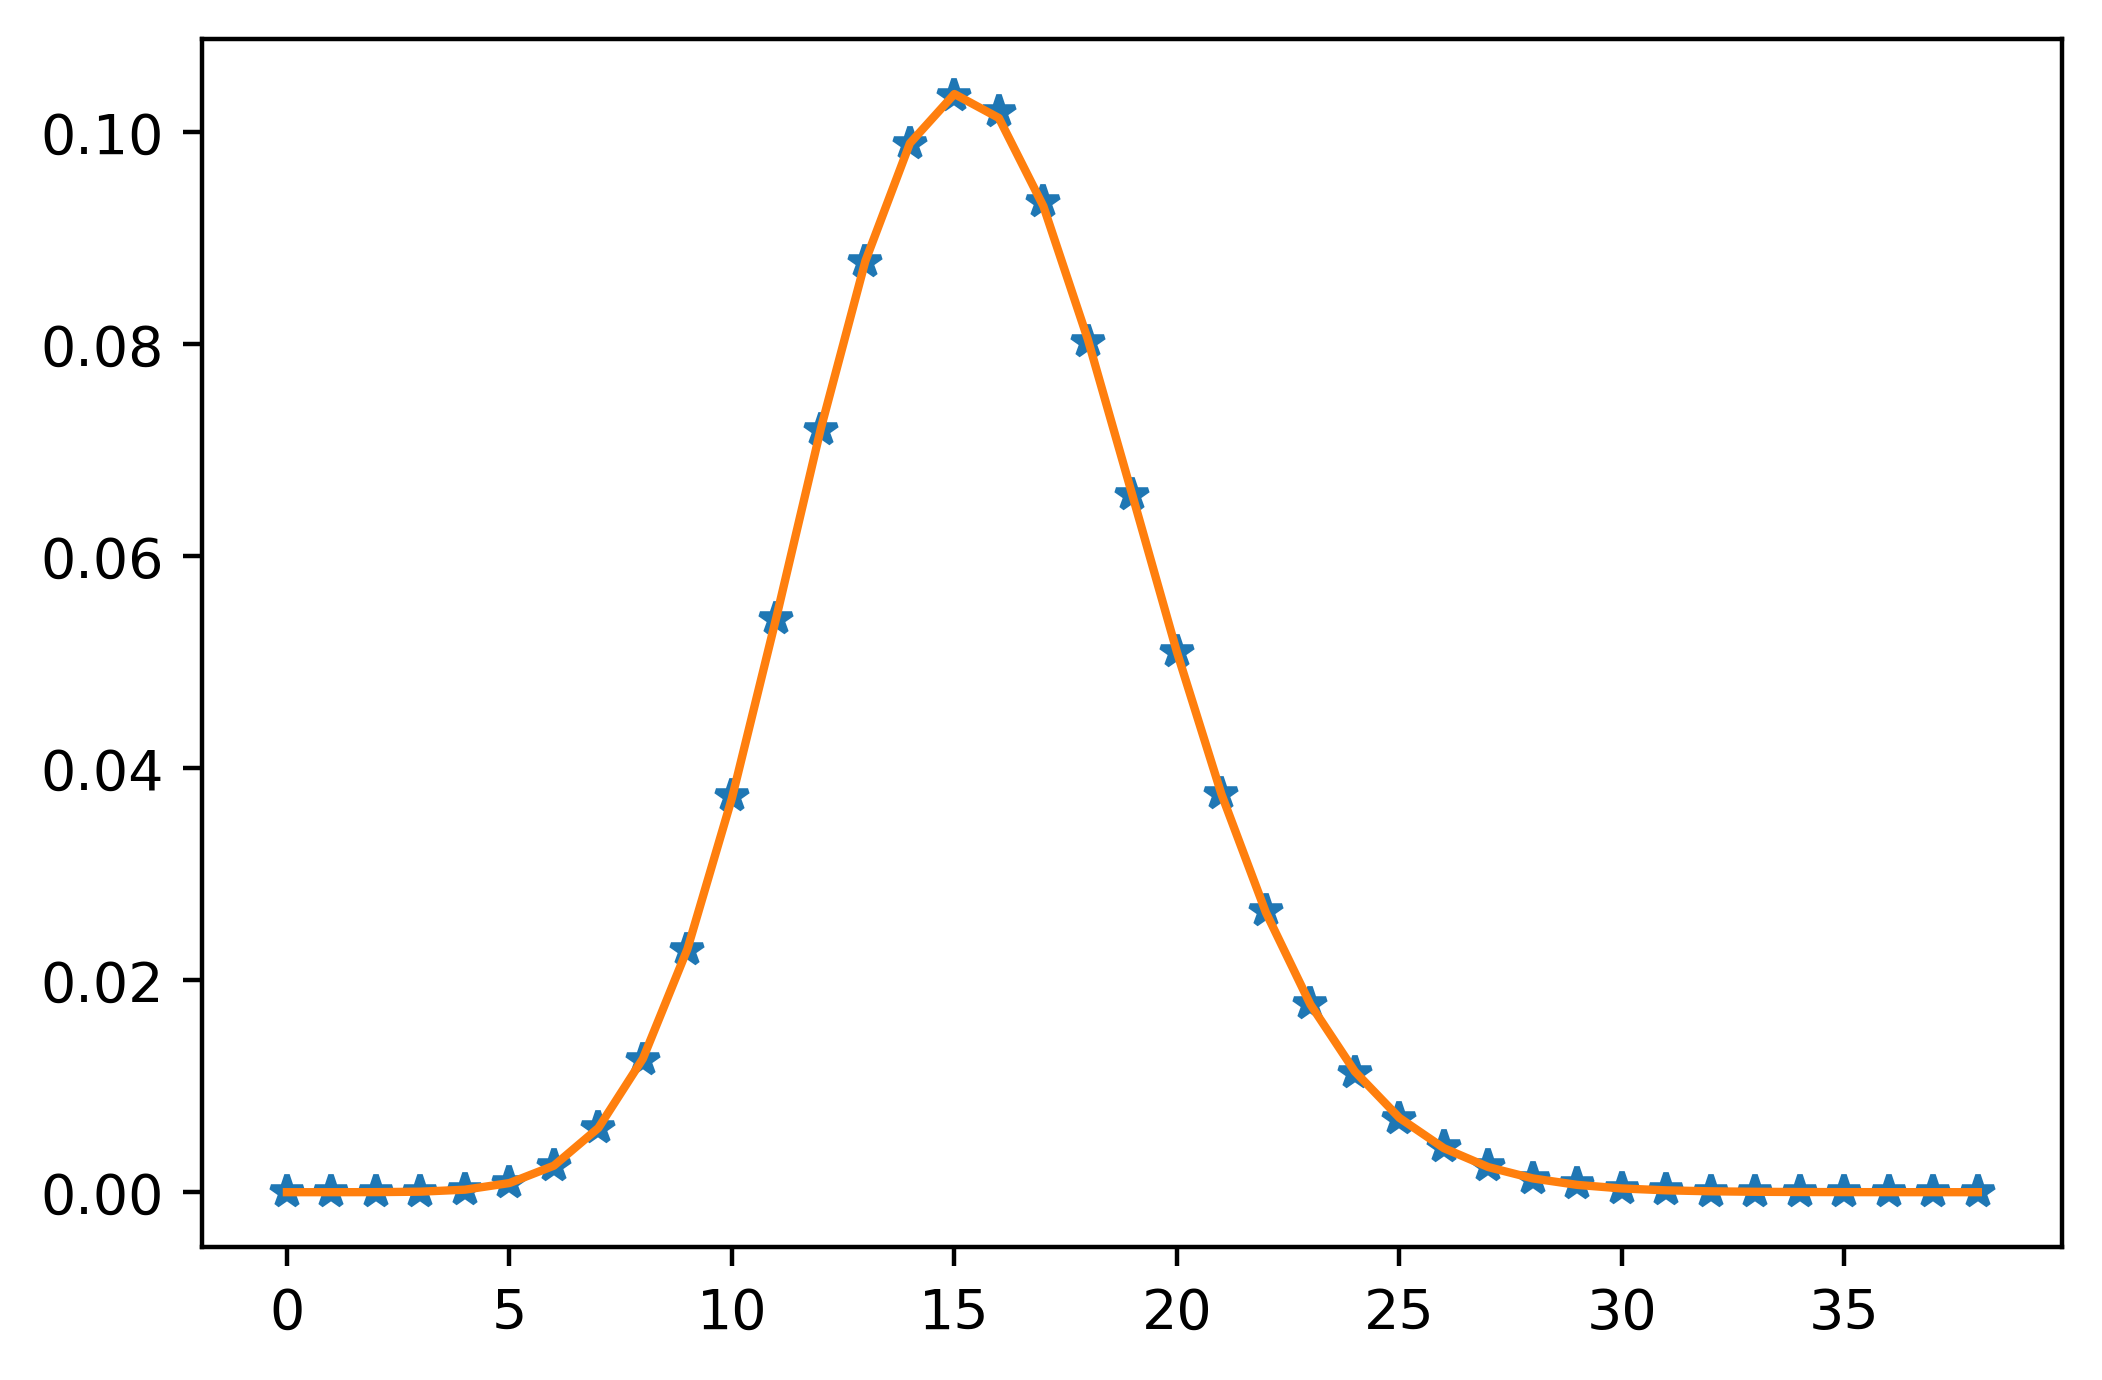

In [3]:
r = 8
z = 1
l = 1.7
samples = get_samples(r, z, l, int(1E6))

counts = np.bincount(samples)

f = plt.figure(dpi=400)
plt.plot(np.arange(len(counts)), counts / len(samples), '*')
plt.plot(np.arange(len(counts)), 
         [np.exp(get_log_transition_prob_rzkl(r, z, k, l)) / (1 - np.exp(-l*(z))) for k in range(len(counts))])

In [4]:
dist = np.array([0., 0.5, 0.25, 0.25])
# dist = [0., 1]
l = 1.79
dist = stats.geom(0.13).pmf(np.arange(K_MAX))
dist = dist / np.sum(dist)
rd = RunDistribution(dist, l)

In [5]:
print(f'{rd.average_length=}')
print(f'{rd.D=}')

rd.average_length=7.692307692307596
rd.D=0.025393340567891803


In [6]:
print('Computing lower bound...')
print(f'{rd.compute_lower_bound() / l=}')

Computing lower bound...


  0%|          | 0/256 [00:00<?, ?it/s]

3.635590878925772 -14.486744368993403 8.43440885244058 3.468072718550822
rd.compute_lower_bound() / l=0.10469887298780471


In [7]:
0.21303 / l

0.11901117318435754

In [8]:
rd.r_dist

array([9.74606659e-01, 3.21730745e-03, 2.80967824e-03, 2.45369520e-03,
       2.14281480e-03, 1.87132259e-03, 1.63422814e-03, 1.42717329e-03,
       1.24635205e-03, 1.08844066e-03, 9.50536465e-04, 8.30104573e-04,
       7.24931265e-04, 6.33083296e-04, 5.52872361e-04, 4.82824060e-04,
       4.21650799e-04, 3.68228121e-04, 3.21574036e-04, 2.80830970e-04,
       2.45250005e-04, 2.14177107e-04, 1.87041111e-04, 1.63343214e-04,
       1.42647814e-04, 1.24574498e-04, 1.08791050e-04, 9.50073477e-05,
       8.29700245e-05, 7.24578165e-05, 6.32774934e-05, 5.52603067e-05,
       4.82588886e-05, 4.21445421e-05, 3.68048764e-05, 3.21417403e-05,
       2.80694183e-05, 2.45130548e-05, 2.14072786e-05, 1.86950007e-05,
       1.63263653e-05, 1.42578333e-05, 1.24513820e-05, 1.08738060e-05,
       9.49610715e-06, 8.29296114e-06, 7.24225237e-06, 6.32466721e-06,
       5.52333905e-06, 4.82353826e-06, 4.21240143e-06, 3.67869495e-06,
       3.21260847e-06, 2.80557462e-06, 2.45011150e-06, 2.13968515e-06,
      

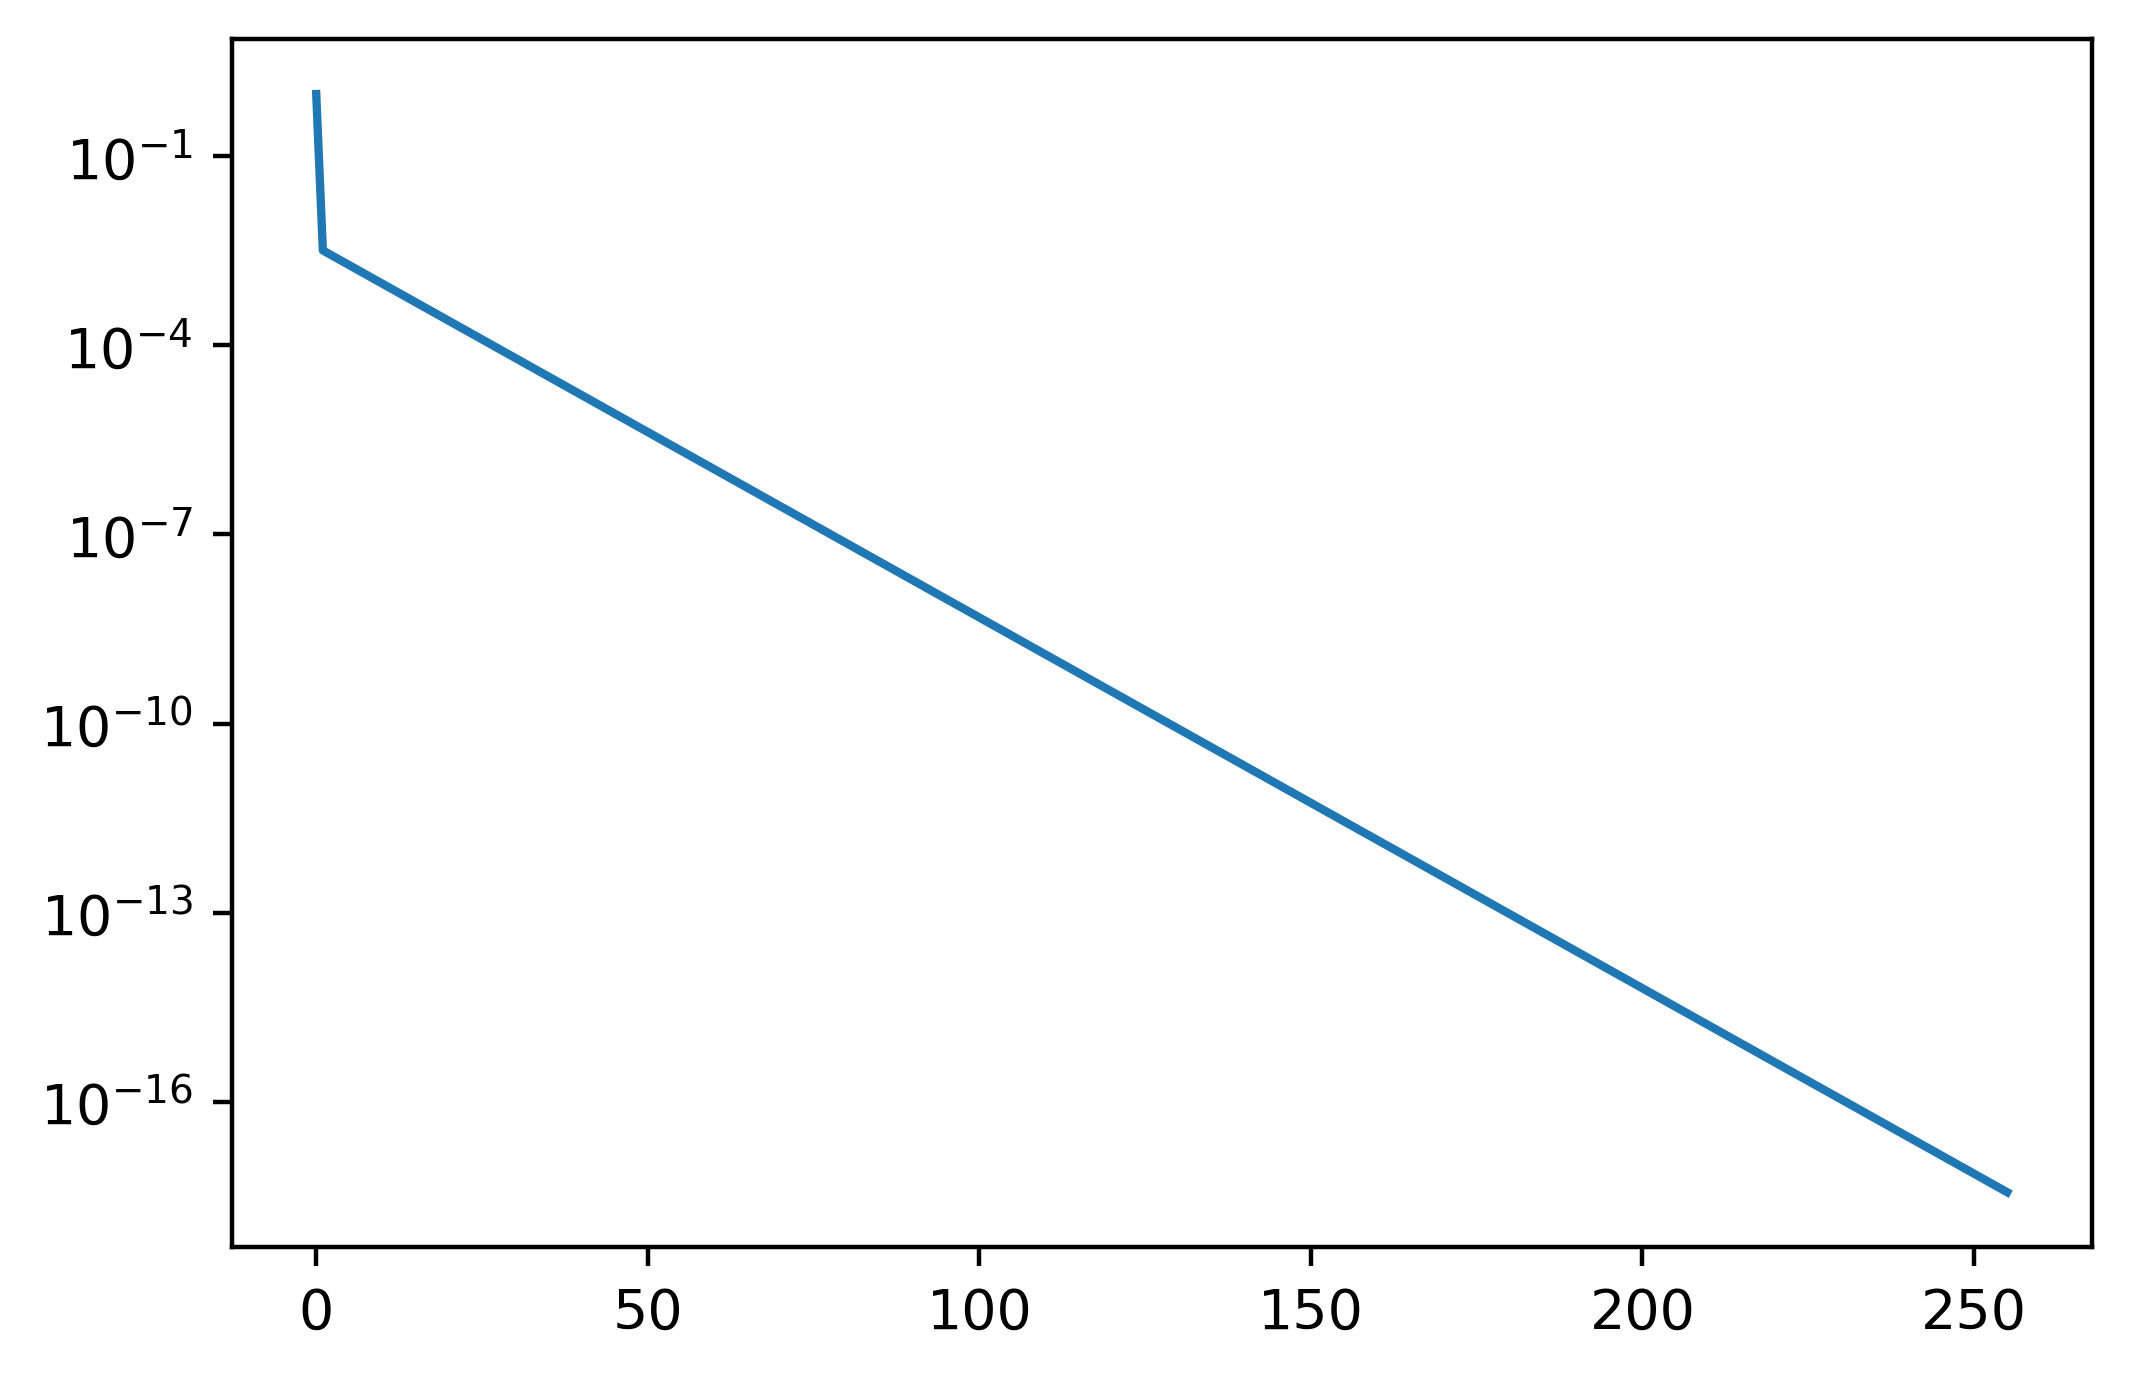

In [9]:
f = plt.figure(dpi=400)
plt.plot(rd.r_dist)
plt.yscale('log')

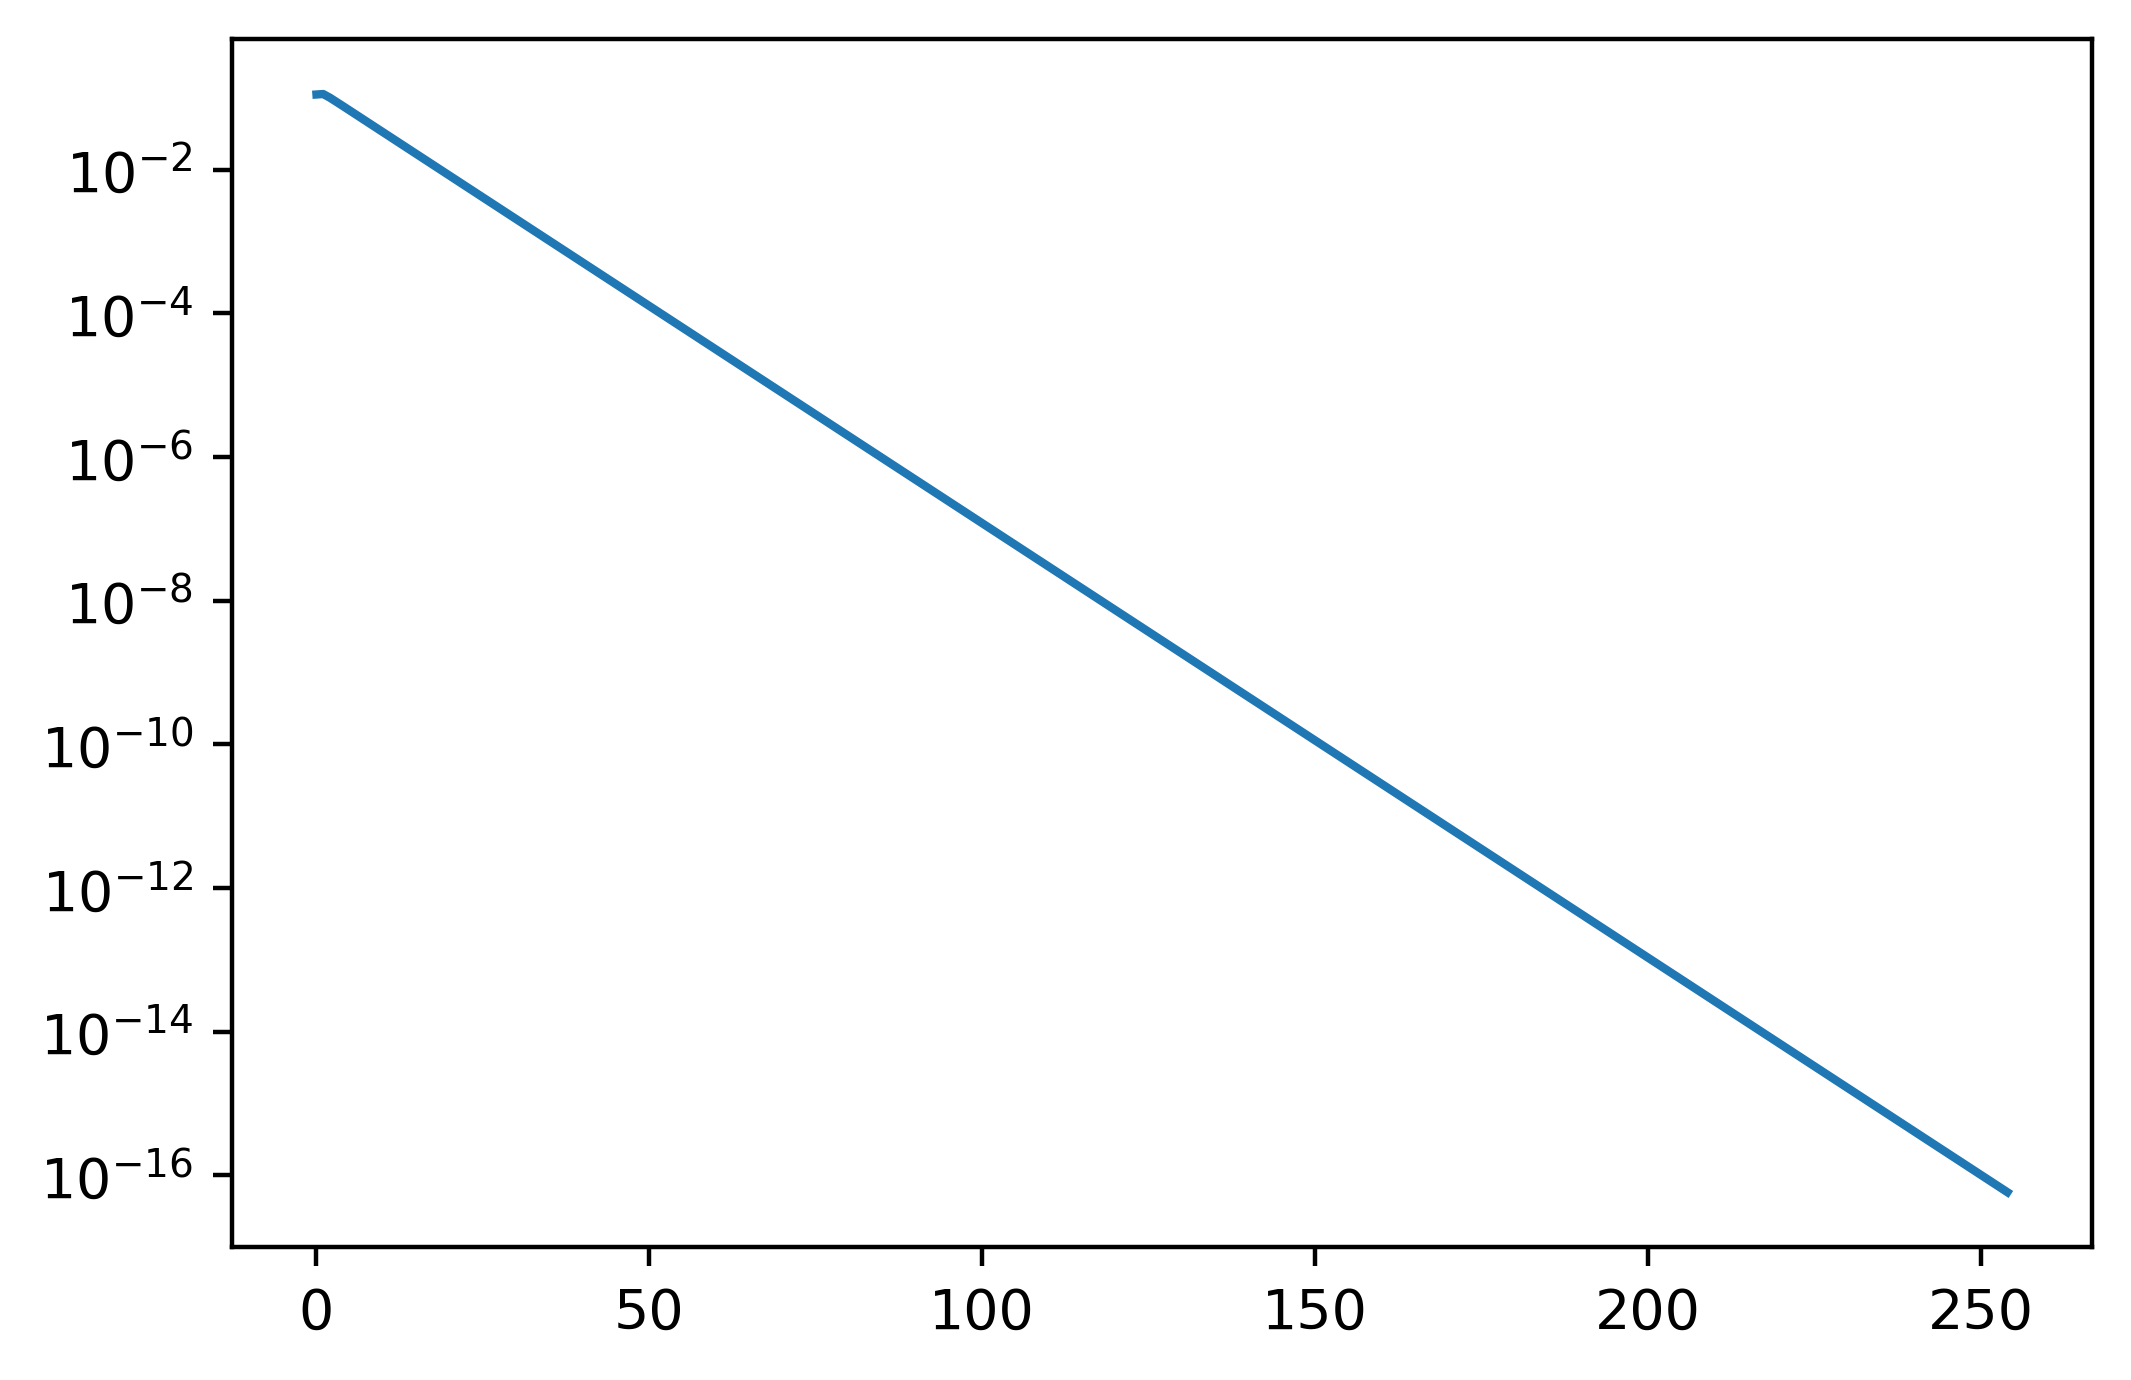

In [10]:
f = plt.figure(dpi=400)
plt.plot(rd.z_dist[1:])
plt.yscale('log')

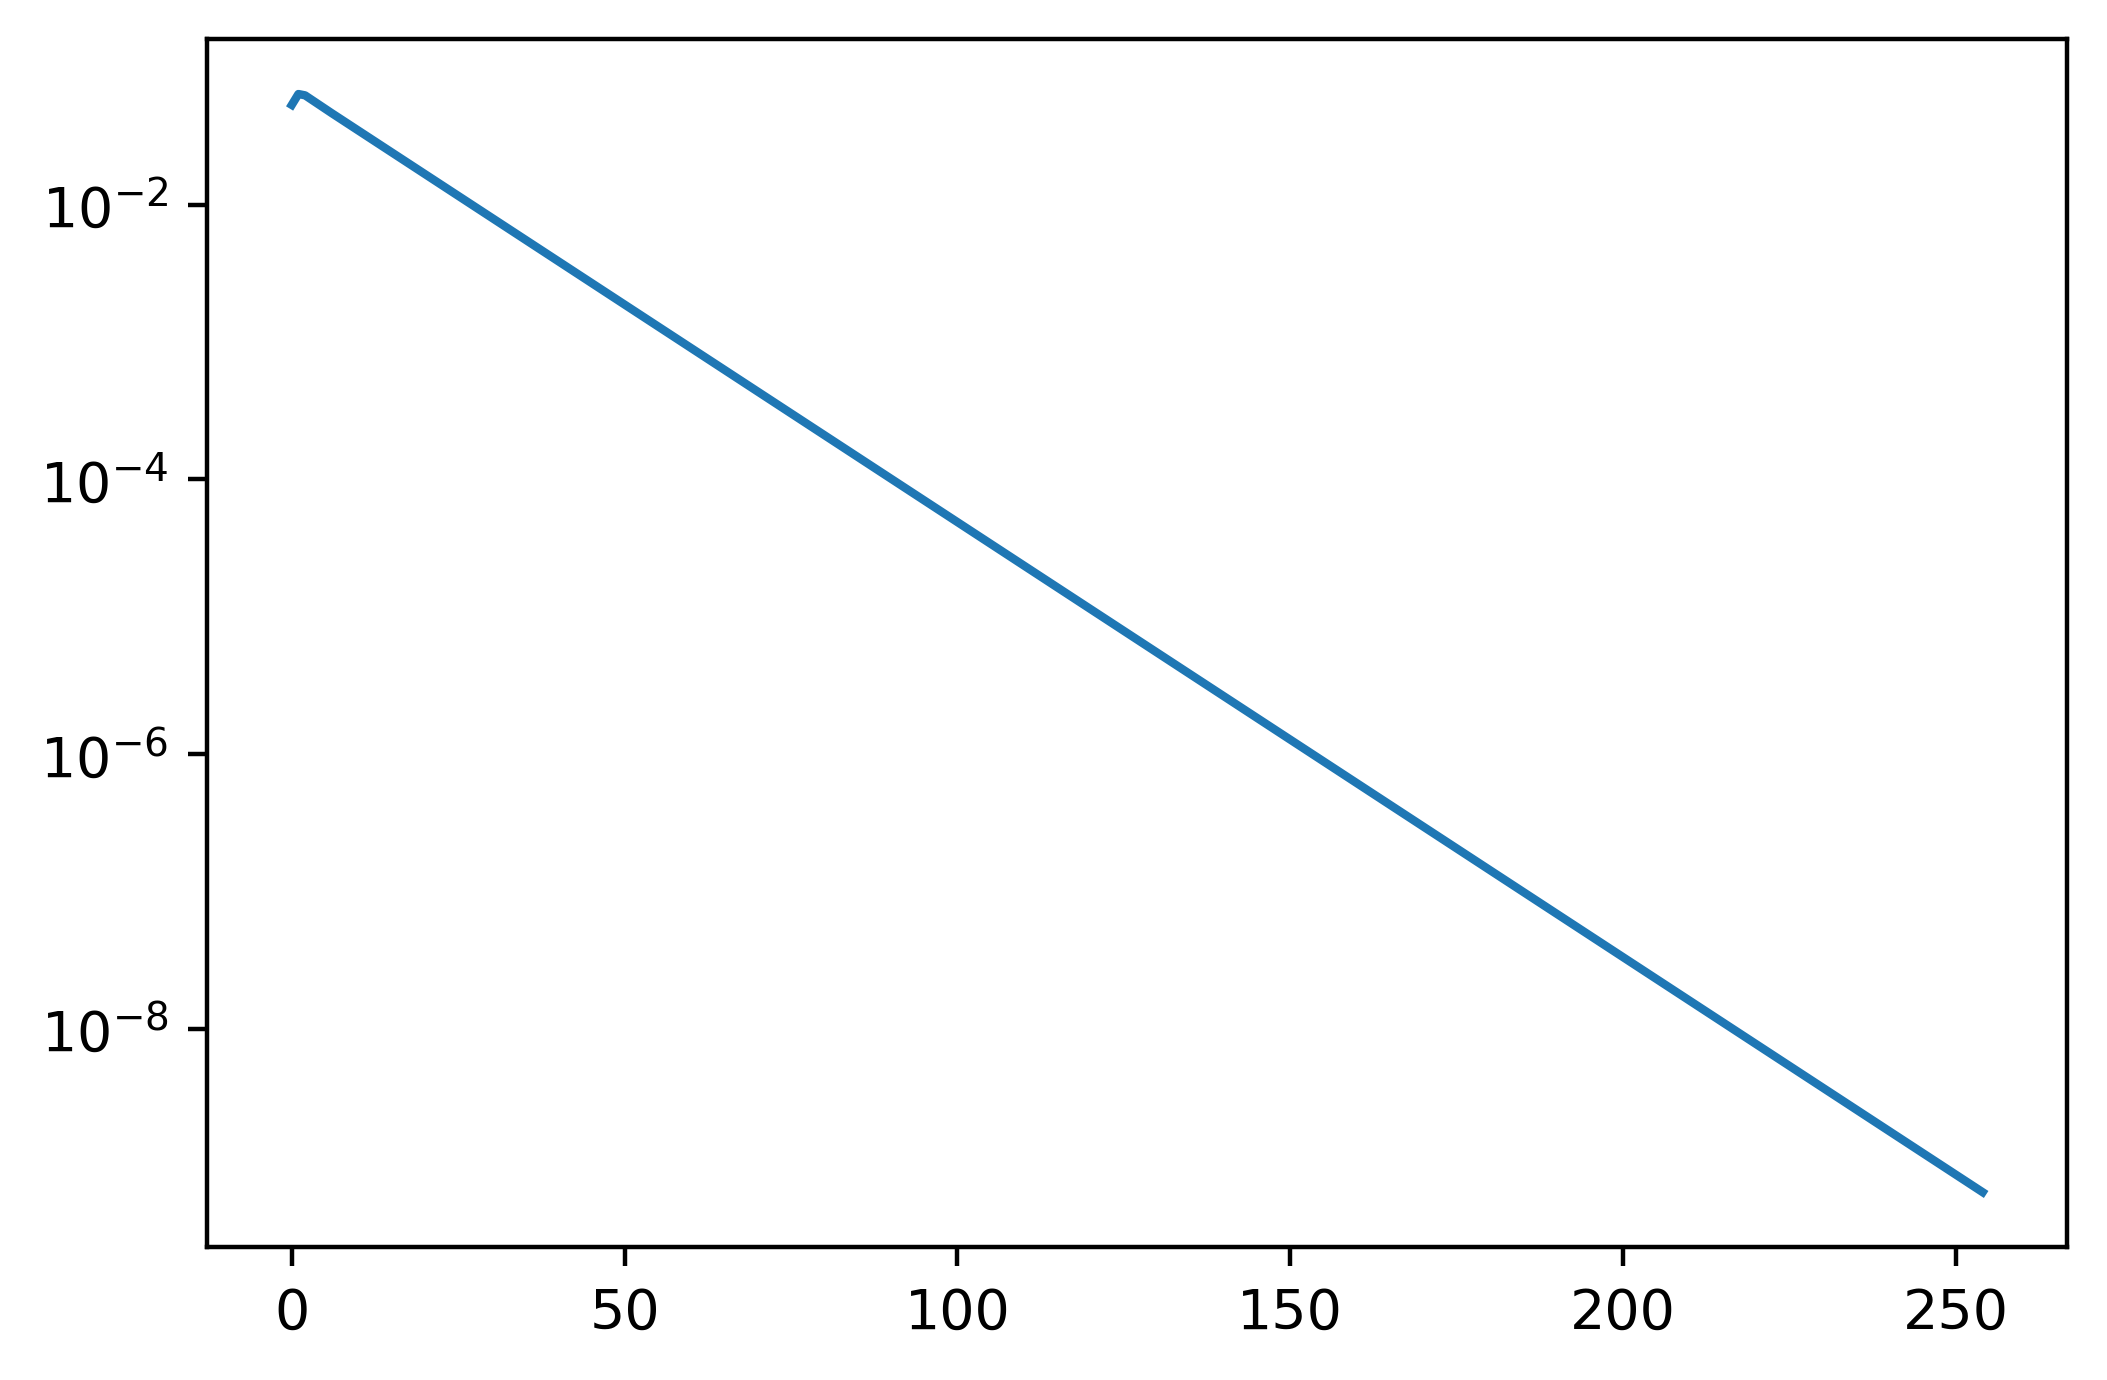

In [11]:
f = plt.figure(dpi=400)
plt.plot(rd.k_dist[1:])
plt.yscale('log')

In [12]:
np.log10(1 - np.sum(rd.k_dist))

-8.070672613727771

In [13]:
np.log10(1 - np.sum(rd.r_dist))

/tmp/ipykernel_1257/3726291756.py:1: RuntimeWarning: divide by zero encountered in log10
  np.log10(1 - np.sum(rd.r_dist))


-inf

In [14]:
np.log10(1 - np.sum(rd.z_dist))

-15.47746851547134